In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re

In [2]:
tweet_data = pd.read_csv("C:/Users/Hp Pc/Downloads/sentiment-emotion-labelled_Dell_tweets.csv")
tweet_test = pd.read_csv("C:/Users/Hp Pc/Downloads/testdata.manual.2009.06.14.csv")

In [3]:
tweet_data.head(10)

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124
5,5,2022-09-30 19:49:40+00:00,1575935931969785856,The screenshot is acting up from the website o...,jonathanj92389,negative,0.936235,sadness,0.968651
6,6,2022-09-30 19:31:57+00:00,1575931475391746048,@emijuju_ @Alienware @Dell @IntelGaming alien ...,diegoaygo,neutral,0.733473,fear,0.370504
7,7,2022-09-30 19:25:45+00:00,1575929914888421395,COOKING STREAM DAY!!! Ty to @Alienware for spo...,emijuju_,positive,0.974963,joy,0.961772
8,8,2022-09-30 19:07:30+00:00,1575925320070623232,@emijuju_ @Alienware @Dell @intel Beautiful 😍❤️😻,Khurram38256043,positive,0.974661,joy,0.986383
9,9,2022-09-30 19:02:37+00:00,1575924090187153416,What's your biggest data management challenge?...,InfoSystems,neutral,0.718806,optimism,0.894296


In [4]:
tweet_test.columns

Index(['4', '3', 'Mon May 11 03:17:40 UTC 2009', 'kindle2', 'tpryan',
       '@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.'],
      dtype='object')

In [5]:
tweet_test.columns = ['score', 'number', "date", "account", "username","text"] 

CLEANING DATA AND EPA

In [6]:
tweet_data = tweet_data.drop(columns = ['Unnamed: 0', 'Tweet Id'], axis=1)
tweet_data['Datetime'] = pd.to_datetime(tweet_data["Datetime"])

In [7]:
tweet_data.dtypes

Datetime           datetime64[ns, UTC]
Text                            object
Username                        object
sentiment                       object
sentiment_score                float64
emotion                         object
emotion_score                  float64
dtype: object

In [8]:
print(tweet_data['sentiment'].value_counts())
print(tweet_data['emotion'].value_counts())

sentiment
negative    10556
positive     7366
neutral      7048
Name: count, dtype: int64
emotion
anger           7520
joy             6326
anticipation    5171
disgust         3000
sadness         1328
optimism        1225
fear             366
surprise          34
Name: count, dtype: int64


In [9]:
tweet_data['year'] = tweet_data['Datetime'].dt.year

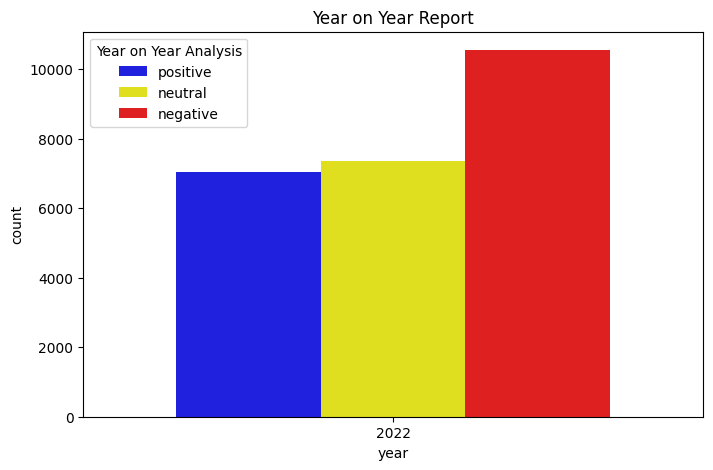

In [10]:
plt.figure(figsize=(8,5))
year_sentiment = tweet_data[['year', 'sentiment']].sort_values('year')

plot = sns.countplot(data=year_sentiment, x='year', hue='sentiment', width=0.7, palette=['blue', 'yellow', 'red'])
plot.legend(title='Year on Year Analysis', labels=['positive', 'neutral', 'negative'])
plt.title('Year on Year Report')
plt.show()

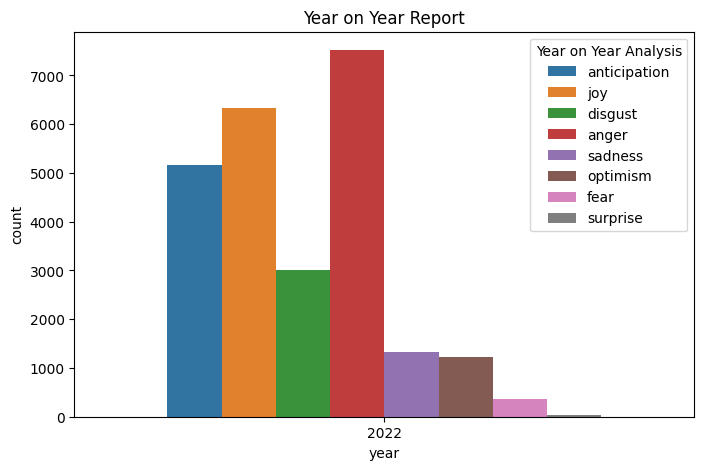

In [11]:
plt.figure(figsize=(8,5))
year_emotion = tweet_data[['year', 'emotion']].sort_values('year')

plot = sns.countplot(data=year_emotion, x='year', hue='emotion', width=0.7)
plot.legend(title='Year on Year Analysis')
plt.title('Year on Year Report')
plt.show()

In [12]:
sents_map = {
    "negative":0,
    "positive": 1
}

tweet_data['sentiment'] = tweet_data['sentiment'].map(sents_map)

In [13]:
tweet_data = tweet_data.dropna()

In [16]:
good_emotions = ['joy', 'anticipation', 'optimism', 'surprise']

tweet_data['emotion'] = tweet_data['emotion'].apply(lambda x: 2 if x in good_emotions else 1)

In [17]:
tweet_data['sentiment_weight'] = tweet_data['sentiment'] * tweet_data['sentiment_score']
tweet_data['emotion_weight'] = tweet_data['emotion'] * tweet_data['emotion_score']

In [18]:
zero_df  = tweet_data[tweet_data['sentiment'] ==0].sample(n = 5000, random_state=42)

one_df = tweet_data[tweet_data['sentiment'] == 1].sample(n=5000, random_state=42)

new_df = pd.concat([one_df, zero_df])
tweet_data = new_df.sample(frac=1).reset_index(drop=True) 

MODELLING

In [19]:
predictors = ['token_vec', 'sentiment_score', "sentiment_weight", 'emotion_score', 'emotion_weight']

In [20]:
tweet_data['sentiment'].value_counts()

sentiment
1.0    5000
0.0    5000
Name: count, dtype: int64

In [21]:
def clean_text(text):
    return re.sub(r"[^a-zA-Z ]", "", text)

In [22]:
tweet_data['Text'] = tweet_data['Text'].apply(clean_text)

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(ngram_range = (1,2))

tweet_data['token_vec'] = vectorizer.fit_transform(tweet_data['Text']).toarray()